<a href="https://colab.research.google.com/github/isiri01/Anemia-detection/blob/main/Anemia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [52]:
train_df = pd.read_csv("/content/anemia.csv")
train_df=train_df.reindex(np.random.permutation(train_df.index)) # shuffle the examples
test_df=pd.read_csv('/content/anemia.csv')

In [53]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,1421.0,0.520760,0.499745,0.0,0.0,1.0,1.0,1.0
Hemoglobin,1421.0,13.412738,1.974546,6.6,11.7,13.2,15.0,16.9
MCH,1421.0,22.905630,3.969375,16.0,19.4,22.7,26.2,30.0
MCHC,1421.0,30.251232,1.400898,27.8,29.0,30.4,31.4,32.5
MCV,1421.0,85.523786,9.636701,69.4,77.3,85.3,94.2,101.6
Result,1421.0,0.436312,0.496102,0.0,0.0,0.0,1.0,1.0


In [54]:
test_df.head(n=100)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
95,0,13.7,19.5,31.7,77.1,0
96,1,12.9,27.4,28.2,78.8,1
97,1,11.8,22.0,29.3,71.1,1
98,0,15.5,16.9,31.2,95.9,0


In [84]:
#menna methana baba balanna train test features gatta widiha
train_features = train_df.iloc[0:80, :]
test_features = test_df.iloc[80:, :]

train_labels = train_features.pop('Result')
test_labels = test_features.pop('Result')

In [85]:
train_features.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV'], dtype='object')

In [86]:
# Keras Input tensors of float values.
'''
inputs = {
    'Gender':
        tf.keras.layers.Input(shape=(1,), dtype=tf.bool,
                              name='Gender'),
    'Hemoglobin':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Hemoglobin'),
    'MCH':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='MCH'),
    'MCHC':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='MCHC'),

    'MCV':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='MCV')

}
'''

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())



# Concatenate our inputs into a single tensor.
#preprocessing_layers = tf.keras.layers.Concatenate()(
   # [Hemoglobin, MCH, MCHC, MCV])




[[ 0.575    13.373752 22.363752 30.213753 85.865   ]]


In [97]:

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation="relu"),
      layers.Dense(1)
  ])

  model.compile(loss='BinaryCrossentropy',
                optimizer=tf.keras.optimizers.Adam(0.001),metrics=['accuracy'])
  return model

In [98]:
dnn_model=build_and_compile_model(normalizer)

In [99]:
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=50,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)



Epoch 1/50
2/2 [==============================] - 1s 222ms/step - loss: 6.6109 - accuracy: 0.5000 - val_loss: 4.5907 - val_accuracy: 0.6250
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 5.9733 - accuracy: 0.5000 - val_loss: 4.3438 - val_accuracy: 0.6250
Epoch 3/50
2/2 [==============================] - 0s 33ms/step - loss: 5.8933 - accuracy: 0.5000 - val_loss: 4.2650 - val_accuracy: 0.6250
Epoch 4/50
2/2 [==============================] - 0s 33ms/step - loss: 5.6559 - accuracy: 0.5000 - val_loss: 3.6147 - val_accuracy: 0.6250
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 5.3903 - accuracy: 0.5000 - val_loss: 3.4888 - val_accuracy: 0.6250
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 5.1582 - accuracy: 0.5000 - val_loss: 3.4266 - val_accuracy: 0.6250
Epoch 7/50
2/2 [==============================] - 0s 34ms/step - loss: 4.9582 - accuracy: 0.5156 - val_loss: 2.7058 - val_accuracy: 0.6250
Epoch 8/50
2/2 [==========

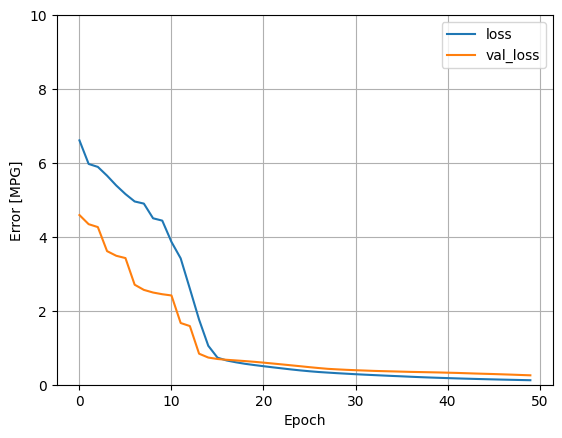

In [100]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)


plot_loss(history)

In [101]:

# Evaluate the model on the test data using `evaluate`
test_loss, test_acc = dnn_model.evaluate(test_features, test_labels)

# Print the results
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

42/42 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.9284
Test loss: 0.23701483011245728
Test accuracy: 0.9284116625785828
